In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from matplotlib.ticker import MaxNLocator

<h3>Instancia normal:</h3>

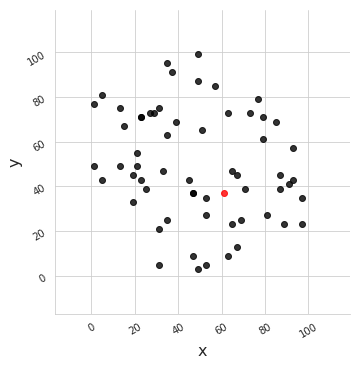

In [2]:
def bound(value, low=-90, high=90):
    diff = high - low
    return (((value - low) % diff) + low)

def get_cluster_color(cluster, list_of_colors):
    return list_of_colors[cluster]

line_vectors = []
bisector_vectors = []

def get_cluster_separator_points(i, j, min_nodes, max_nodes):
    x_1 = min_nodes[i][0]
    y_1 = min_nodes[i][1]
    x_2 = max_nodes[j][0]
    y_2 = max_nodes[j][1]    
    mid_x = (x_1 + x_2)/2
    mid_y = (y_1 + y_2)/2
    pto1 = [depot_x, depot_y]
    pto2 = [mid_x, mid_y]
    
    V = [pto2[0] - pto1[0], pto2[1] - pto1[1]]
    factor_distance = math.sqrt((depot_x - x_2)**2 + (depot_y - y_2)**2)
    pext = [pto1[0] + V[0]*factor_distance, pto1[1] + V[1]*factor_distance]
    line_vectors.append(pto2)
        
    return [pto1 , pext]

def calculate_bisector(i, j, line_vectors):
    V_a = line_vectors[i]
    V_b = line_vectors[j]
    bisector = [(V_a[0]+V_b[0])/2, (V_a[1]+V_b[1])/2]
    return bisector
    

df_clusters = pd.read_csv('../output/3-sweep-algorithm/clusters.csv')


cant_clusters = df_clusters['cluster'].max()
cluster_colors = sns.color_palette("cubehelix", cant_clusters).as_hex()
cluster_colors.insert(0, '#ff0000')

cluster_colors_dummy = []
for i in range (cant_clusters):
    cluster_colors_dummy.append('#000000')
    
cluster_colors_dummy.insert(0, '#ff0000')


a4_dims = (10.75, 3.975)
sns.set_style("whitegrid")

ax = sns.lmplot(x='x', y='y', data=df_clusters,
    fit_reg=False,
    hue='cluster',
    palette=cluster_colors_dummy,
    legend=False)

min_point_x = df_clusters['x'].min()
min_point_y = df_clusters['y'].min()
max_point_x = df_clusters['x'].max()
max_point_y = df_clusters['y'].max()

if abs(max_point_x - min_point_x) > abs(max_point_y - min_point_y):
    max_cota = [min_point_x, max_point_x]
else:
    max_cota = [min_point_y, max_point_y]
    

plt.xlabel("x", fontsize=16)
plt.ylabel("y", fontsize=16)
    
plt.xlim(max_cota[0] - 20, max_cota[1] + 20)
plt.ylim(max_cota[0] - 20, max_cota[1] + 20)

plt.tick_params(labelsize=10, rotation=30)

plt.show()

<h3>Clústers que se formaron:</h3>

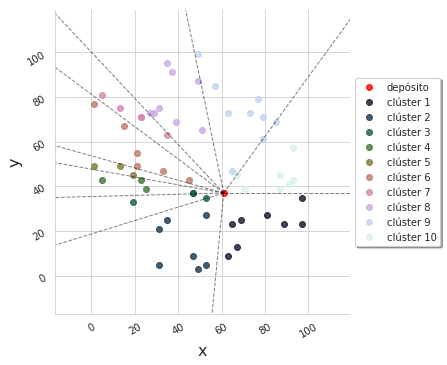

In [3]:
ax = sns.lmplot(x='x', y='y', data=df_clusters,
    fit_reg=False,
    hue='cluster',
    palette=cluster_colors,
    legend=False)

leyendas = ["depósito"]
for i in range(0, cant_clusters):
    leyendas.append("clúster " + str(i + 1))
    
plt.legend(leyendas, loc='center left', bbox_to_anchor=(1.0, 0.5), shadow=True)





# Calculate and draw cluster separation lines
depot_x = int(df_clusters.loc[df_clusters['cluster'] == 0].x)
depot_y = int(df_clusters.loc[df_clusters['cluster'] == 0].y)

min_nodes = []
max_nodes = []
for i in range(1, cant_clusters+1):
    filtered_nodes = df_clusters.loc[df_clusters['cluster'] == i]
    min_node_from_cluster = filtered_nodes.loc[filtered_nodes['theta'].idxmin()]
    max_node_from_cluster = filtered_nodes.loc[filtered_nodes['theta'].idxmax()]
    min_x = min_node_from_cluster.x
    min_y = min_node_from_cluster.y
    min_nodes.append((min_x,min_y))
    max_x = max_node_from_cluster.x
    max_y = max_node_from_cluster.y
    max_nodes.append((max_x,max_y))

for i in range(0, cant_clusters-1):
    puntos = get_cluster_separator_points(i, i+1, min_nodes, max_nodes)
    plt.plot([puntos[0][0], puntos[1][0]], [puntos[0][1], puntos[1][1]], 'k--', linewidth=1, alpha=0.5)
puntos = get_cluster_separator_points(cant_clusters-1, 0, min_nodes, max_nodes)
plt.plot([puntos[0][0], puntos[1][0]], [puntos[0][1], puntos[1][1]], 'k--', linewidth=1, alpha=0.5)

# Draw bisection points
for i in range(0, len(line_vectors)-1):
    bisector = calculate_bisector(i, i+1, line_vectors)
    bisector_vectors.append(bisector)
    #plt.plot([depot_x, bisector_vectors[i][0]], [depot_y, bisector_vectors[i][1]], 'r--', linewidth=1)
#    plt.annotate(leyendas[i+2],
#                bisector,
#                horizontalalignment='center',
#                verticalalignment='center',
#                size=24, alpha=0.5, weight= 'bold',
#                #rotation=bound(math.degrees(math.atan2(bisector[1] - depot_y, bisector[0] - depot_x))),
#                color=cluster_colors[i+2])

bisector = calculate_bisector(len(line_vectors)-1, 0, line_vectors)
bisector_vectors.append(bisector)
#plt.plot([depot_x, bisector_vectors[len(line_vectors)-1][0]], [depot_y, bisector_vectors[len(line_vectors)-1][1]], 'r--', linewidth=1)
#plt.annotate(leyendas[1],
#                bisector,
#                horizontalalignment='center',
#                verticalalignment='center',
#                size=24, alpha=0.5, weight= 'bold',
#                #rotation=bound(math.degrees(math.atan2(bisector[1] - depot_y, bisector[0] - depot_x))),
#                color=cluster_colors[1])




plt.xlabel("x", fontsize=16)
plt.ylabel("y", fontsize=16)
    
plt.xlim(max_cota[0] - 20, max_cota[1] + 20)
plt.ylim(max_cota[0] - 20, max_cota[1] + 20)

plt.tick_params(labelsize=10, rotation=30)

plt.show()

<h3>Rutas de los camiones:</h3>

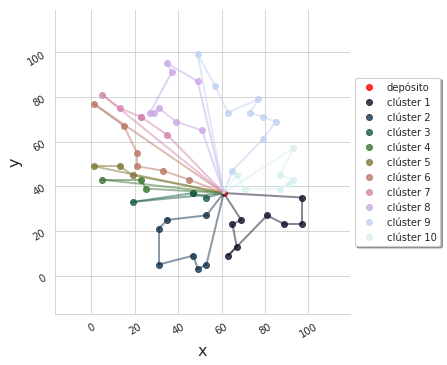

In [4]:
df_rutas = pd.read_csv('../output/3-sweep-algorithm/rutas.csv')

cant_camiones = df_rutas['camion'].max()

a4_dims = (10.75, 3.975)
sns.set_style("whitegrid")

ax = sns.lmplot(x='x', y='y', data=df_clusters,
    fit_reg=False,
    hue='cluster',
    palette=cluster_colors,
    legend=False)

plt.legend(leyendas, loc='center left', bbox_to_anchor=(1.0, 0.5), shadow=True)

for k in range(1, cant_camiones+1):
    nodos_ruta = df_rutas.loc[df_rutas['camion'] == k]['ruta'].to_string(index=False).split(" ")
    for i in range(0, len(nodos_ruta) - 1):
        nodo_a_info = df_clusters.loc[df_clusters['id'] == int(nodos_ruta[i])]
        nodo_b_info = df_clusters.loc[df_clusters['id'] == int(nodos_ruta[i+1])]
        nodo_a_x = int(nodo_a_info['x'])
        nodo_a_y = int(nodo_a_info['y'])
        nodo_b_x = int(nodo_b_info['x'])
        nodo_b_y = int(nodo_b_info['y'])
        path_color = cluster_colors[k]
        plt.plot([nodo_a_x, nodo_b_x], [nodo_a_y, nodo_b_y], '-', color=path_color, linewidth=2, alpha=0.5)


plt.xlabel("x", fontsize=16)
plt.ylabel("y", fontsize=16)
    
plt.xlim(max_cota[0] - 20, max_cota[1] + 20)
plt.ylim(max_cota[0] - 20, max_cota[1] + 20)

plt.tick_params(labelsize=10, rotation=30)

plt.show()